In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive

drive.mount('/content/drive')

df_data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Customer_LTV_Prediction/archive/Data/train_Data.csv')

Mounted at /content/drive


In [3]:
df_data.head()

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,...,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE,Top-up Month
0,1,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,...,1568,21946,61.11,M,49.0,35833.33,RAISEN,MADHYA PRADESH,464993.0,> 48 Months
1,2,Monthly,Advance,Closed,PDC,333,BHOPAL,47,485000,350000.0,...,1062,34802,70.00,M,23.0,666.67,SEHORE,MADHYA PRADESH,466001.0,No Top-up Service
2,3,Quatrly,Arrear,Active,Direct Debit,1,NaN,68,690000,519728.0,...,1060,127335,69.77,M,39.0,45257.00,BHOPAL,MADHYA PRADESH,462030.0,12-18 Months
3,7,Monthly,Advance,Closed,Billed,125,GUNA,48,480000,400000.0,...,1060,25094,80.92,M,24.0,20833.33,ASHOK NAGAR,MADHYA PRADESH,473335.0,> 48 Months
4,8,Monthly,Arrear,Closed,Billed,152,BILASPUR,44,619265,440000.0,...,1046,21853,71.05,M,56.0,27313.67,BILASPUR,CHATTISGARH,495442.0,36-48 Months


In [4]:
df_data.shape

(128655, 26)

In [5]:
df_data.isnull().sum()

ID                     0
Frequency              0
InstlmentMode          0
LoanStatus             0
PaymentMode            0
BranchID               0
Area               11653
Tenure                 0
AssetCost              0
AmountFinance          0
DisbursalAmount        0
EMI                    0
DisbursalDate          0
MaturityDAte           1
AuthDate               0
AssetID                0
ManufacturerID         0
SupplierID             0
LTV                    0
SEX                   59
AGE                   59
MonthlyIncome        234
City               11256
State                  0
ZiPCODE              372
Top-up Month           0
dtype: int64

In [6]:
# Dropping the missing values
df_data.dropna(how='any', inplace=True)

In [7]:
# Shape of the dataset after dropping the missing values

df_data.shape

(107126, 26)

In [8]:
df_data.dtypes

ID                   int64
Frequency           object
InstlmentMode       object
LoanStatus          object
PaymentMode         object
BranchID             int64
Area                object
Tenure               int64
AssetCost            int64
AmountFinance      float64
DisbursalAmount    float64
EMI                float64
DisbursalDate       object
MaturityDAte        object
AuthDate            object
AssetID              int64
ManufacturerID       int64
SupplierID           int64
LTV                float64
SEX                 object
AGE                float64
MonthlyIncome      float64
City                object
State               object
ZiPCODE            float64
Top-up Month        object
dtype: object

In [9]:
# COnverting the date columns to the datetime type

df_data['DisbursalDate'] = pd.to_datetime(df_data['DisbursalDate'])
df_data['MaturityDAte'] = pd.to_datetime(df_data['MaturityDAte'])
df_data['AuthDate'] = pd.to_datetime(df_data['AuthDate'])

Text(0.5, 1.0, 'Histogram for LTV')

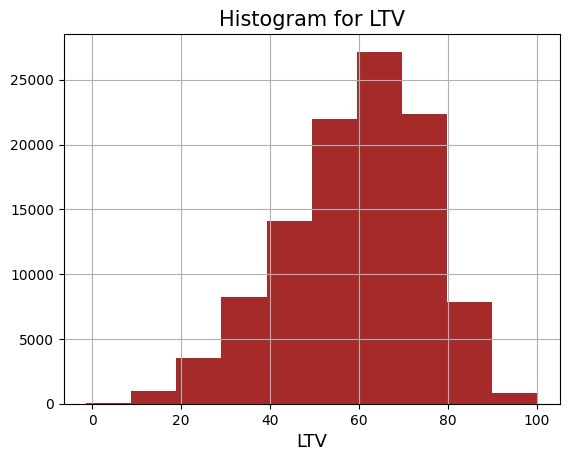

In [10]:
# Distribution of the target variable: LTV

df_data['LTV'].hist(color='brown')
plt.xlabel("LTV", size=13)
plt.title('Histogram for LTV', size=15)

A normal distribution with no skewness

Text(0.5, 1.0, 'Histogram of Asset Cost')

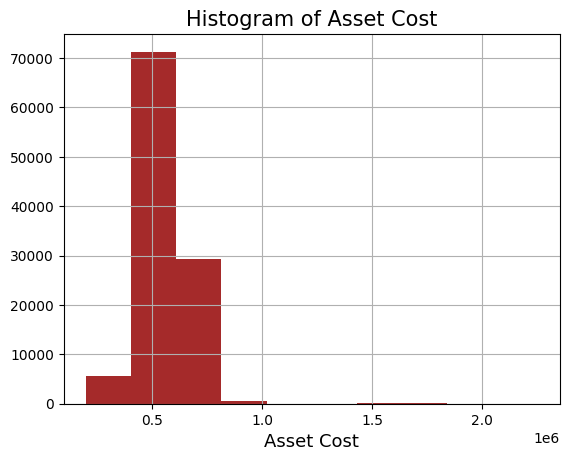

In [11]:
df_data['AssetCost'].hist(color='brown')
plt.xlabel('Asset Cost', size=13)
plt.title('Histogram of Asset Cost', size=15)

Text(0.5, 1.0, 'Boxplot for AssetCost')

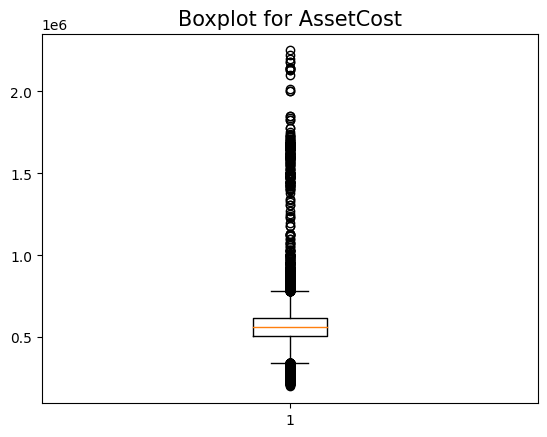

In [12]:
# Boxplot
plt.boxplot(df_data['AssetCost'])
plt.title("Boxplot for AssetCost", size=15)

In [13]:
# Looking at the percentage of outliers
outlier_perc = len(df_data['AssetCost'][df_data['AssetCost'] > 1000000])/len(df_data['AssetCost'])
print(outlier_perc*100, "%")

0.22030132740884564 %


Text(0.5, 1.0, 'Histogram of Asset Cost after removing the outliers')

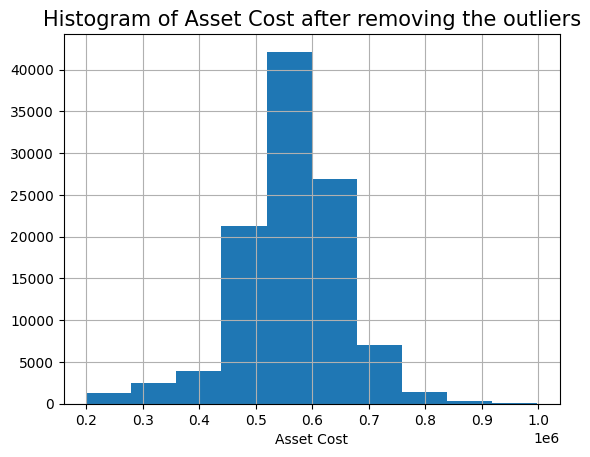

In [14]:
# Histogram after removing the outliers
df_data['AssetCost'][df_data['AssetCost'] < 1000000].hist()
plt.xlabel("Asset Cost")
plt.title("Histogram of Asset Cost after removing the outliers", size=15)


Text(0.5, 1.0, 'Histogram of Age')

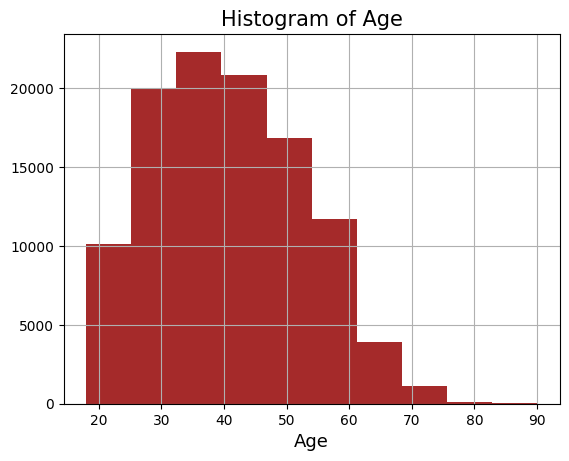

In [15]:
df_data['AGE'].hist(color='brown')
plt.xlabel("Age", size=13)
plt.title('Histogram of Age', size=15)

Text(0.5, 1.0, 'Histogram of Disbursal Amount')

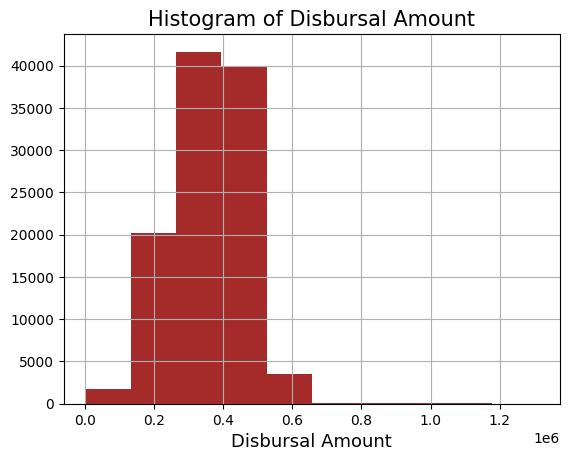

In [16]:
df_data['DisbursalAmount'].hist(color='brown')
plt.xlabel("Disbursal Amount", size=13)
plt.title('Histogram of Disbursal Amount', size=15)

In [17]:
sns.set_context('notebook')

Text(0.5, 1.0, 'Scatter Plot of Asset cost and Disbursal amount')

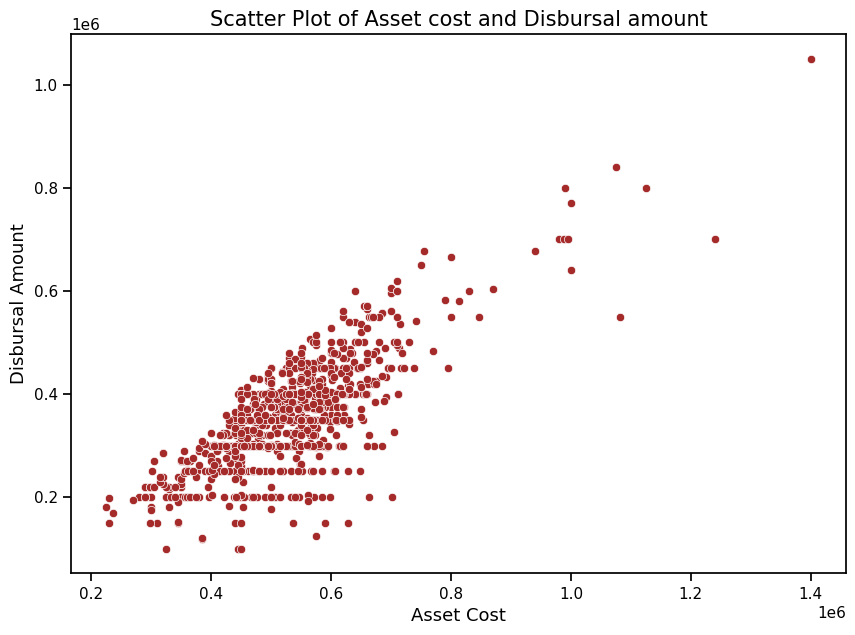

In [18]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='AssetCost', y='DisbursalAmount', data=df_data.head(1000), color='brown')
plt.xlabel("Asset Cost", size=13)
plt.ylabel("Disbursal Amount", size=13)
plt.title("Scatter Plot of Asset cost and Disbursal amount", size=15)

<Axes: title={'center': 'Lineplot of EMI and Asset Cost'}, xlabel='Asset Cost', ylabel='EMI'>

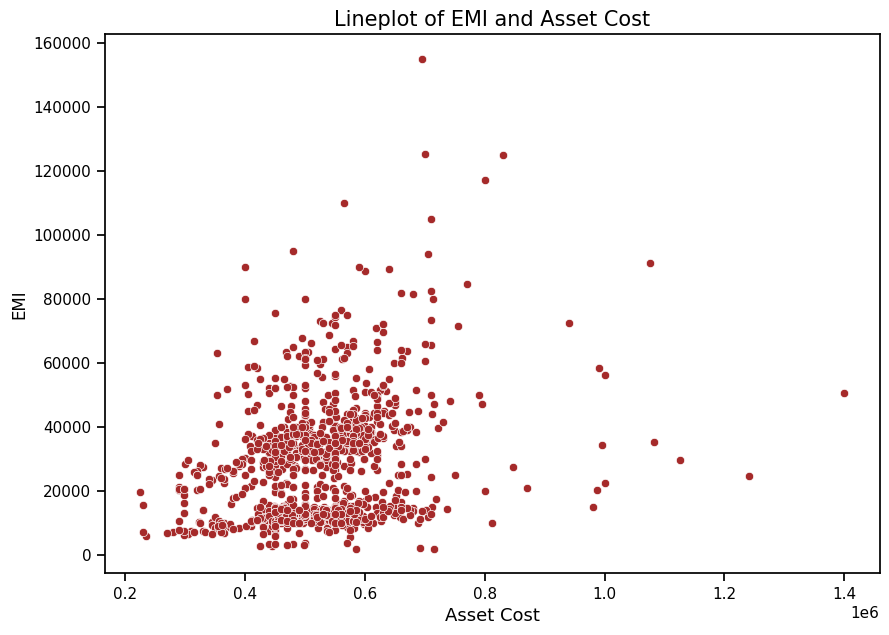

In [19]:
plt.figure(figsize=(10, 7))
plt.xlabel("Asset Cost", size=13)
plt.title("Lineplot of EMI and Asset Cost", size=15)
sns.scatterplot(x='AssetCost', y='EMI', data=df_data.head(1000), color='brown')

<Axes: title={'center': 'Lineplot of EMI and Disbursal Amount'}, xlabel='Disbursal Amount', ylabel='EMI'>

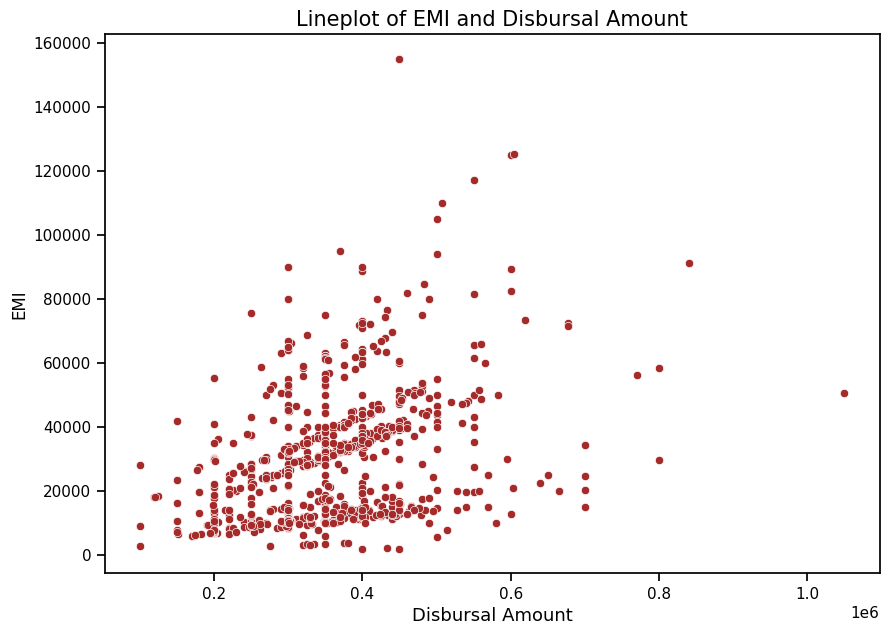

In [20]:
plt.figure(figsize=(10, 7))
plt.xlabel("Disbursal Amount", size=13)
plt.title("Lineplot of EMI and Disbursal Amount", size=15)
sns.scatterplot(x='DisbursalAmount', y='EMI', data=df_data.head(1000), color='brown')

<Axes: title={'center': 'Lineplot of Monthly Income and EMI'}, xlabel='Monthly Income', ylabel='EMI'>

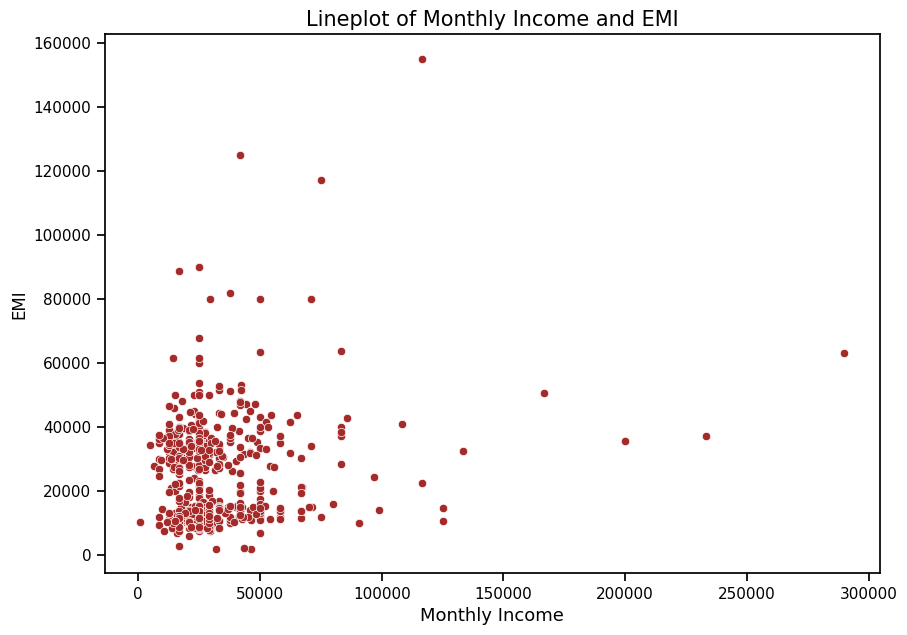

In [21]:
plt.figure(figsize=(10, 7))
plt.xlabel("Monthly Income", size=13)
plt.title("Lineplot of Monthly Income and EMI", size=15)
sns.scatterplot(x='MonthlyIncome', y='EMI', data=df_data.head(500), color='brown')

<ipython-input-22-22c43775b778>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df_data.drop(['ID', 'BranchID', 'ZiPCODE', 'ManufacturerID', 'AssetID', 'SupplierID'], axis=1).corr()


<Axes: >

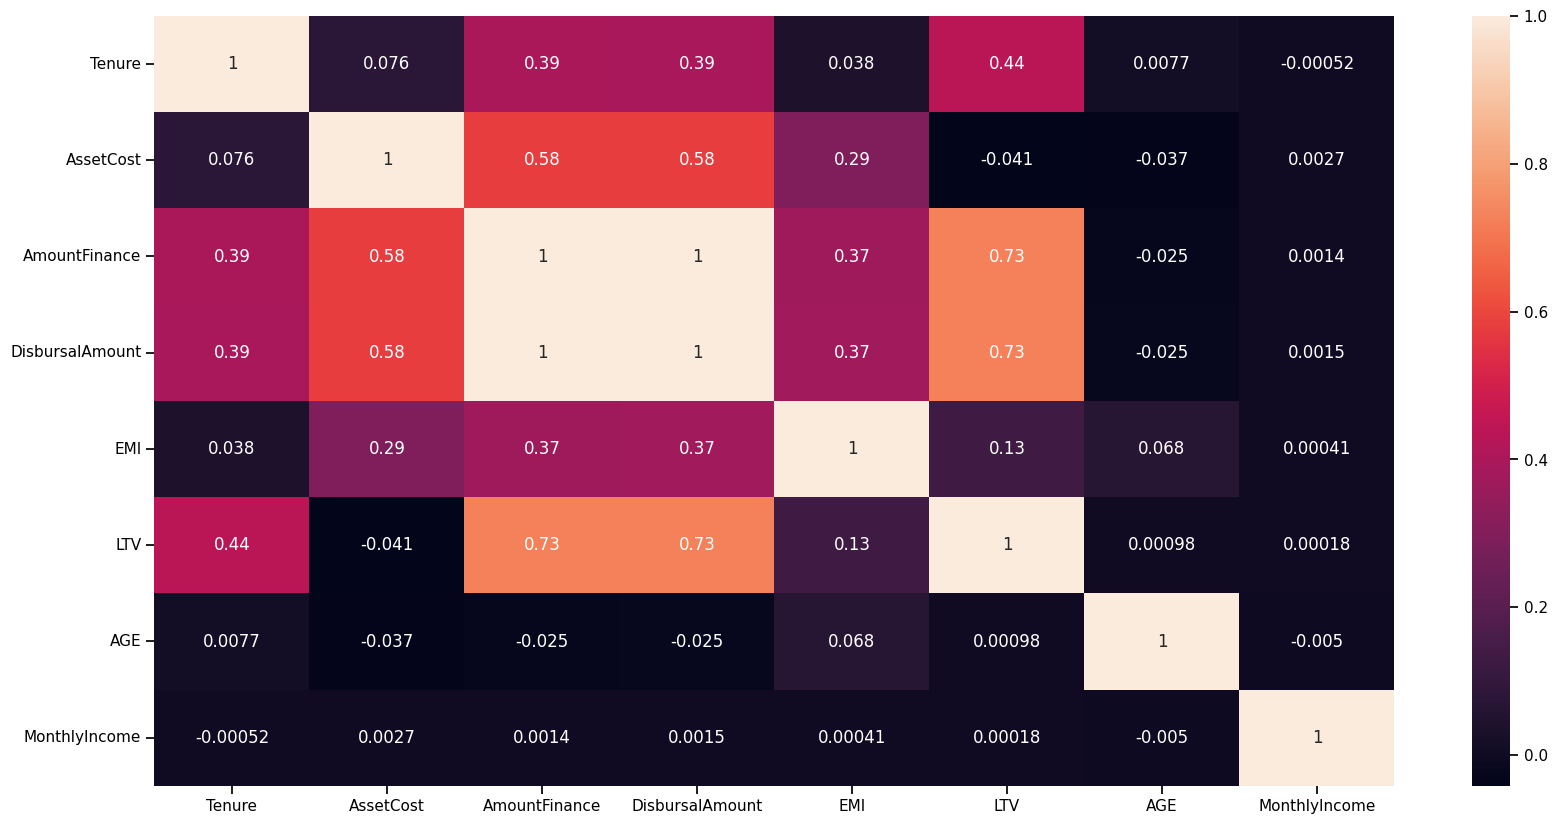

In [22]:
correlation = df_data.drop(['ID', 'BranchID', 'ZiPCODE', 'ManufacturerID', 'AssetID', 'SupplierID'], axis=1).corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlation, annot=True)

There is a perfect correlation between Disbursal Amount and Amount Financed. So, one of them can be deleted before modelling. There is a significant positive correlation between Disbursal Amount and LTV, and between Disbursal Amount and Asset Cost

In [23]:
df_data['LTV'][df_data['LoanStatus'] == 'Active'].describe()

count    31666.000000
mean        63.157627
std         14.492998
min          7.960000
25%         54.680000
50%         64.850000
75%         73.680000
max        100.000000
Name: LTV, dtype: float64

In [24]:
df_data['LTV'][df_data['LoanStatus'] == 'Closed'].describe()

count    75460.000000
mean        57.824348
std         16.036119
min         -1.380000
25%         47.310000
50%         59.430000
75%         69.860000
max         99.460000
Name: LTV, dtype: float64

<ipython-input-25-8d2977dbfa98>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_LTV_loan_status = df_data.groupby(['LoanStatus']).mean()['LTV']


Text(0.5, 1.0, 'Average LTV for each loan status')

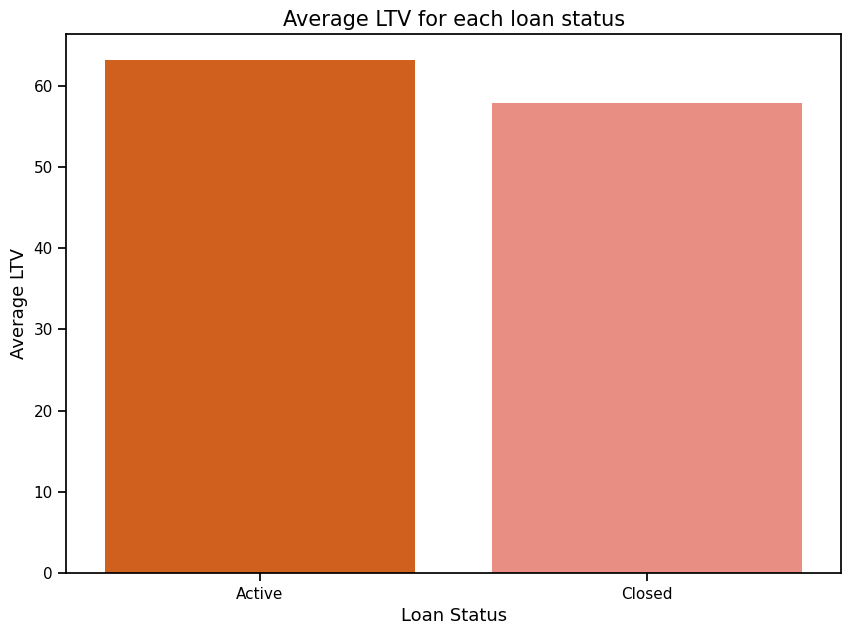

In [25]:
mean_LTV_loan_status = df_data.groupby(['LoanStatus']).mean()['LTV']
plt.figure(figsize=(10, 7))
sns.barplot(x=mean_LTV_loan_status.index, y = mean_LTV_loan_status, palette=['#EC5800', '#FA8072'])
plt.xlabel('Loan Status', size=13)
plt.ylabel('Average LTV', size=13)
plt.title("Average LTV for each loan status", size=15)





In [26]:
mean_LTV_loan_status

LoanStatus
Active    63.157627
Closed    57.824348
Name: LTV, dtype: float64

<ipython-input-27-bb244718c89f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_LTV_frequency = df_data.groupby(['Frequency']).mean()['LTV']


Text(0.5, 1.0, 'Average LTV for each Frequency')

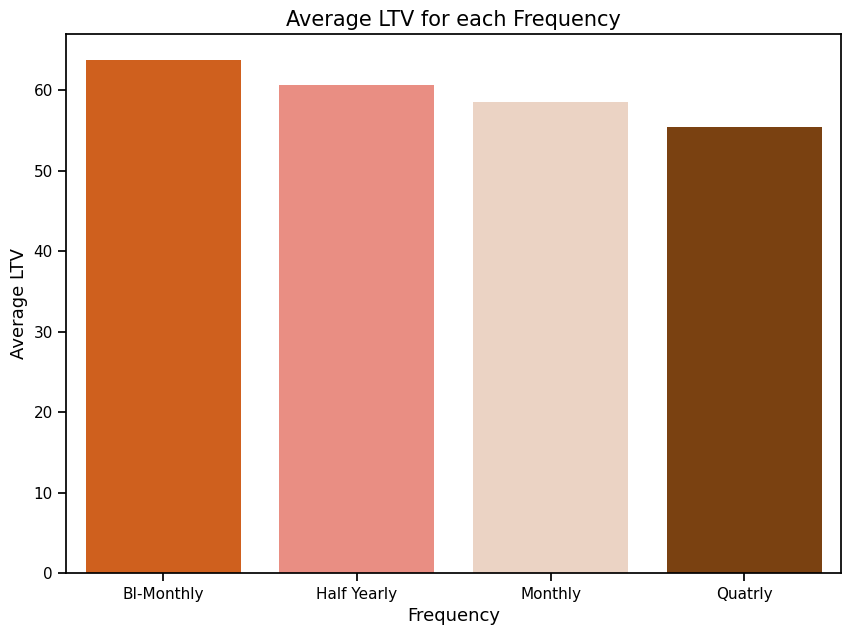

In [27]:

mean_LTV_frequency = df_data.groupby(['Frequency']).mean()['LTV']
plt.figure(figsize=(10, 7))
sns.barplot(x=mean_LTV_frequency.index, y = mean_LTV_frequency, palette=['#EC5800', '#FA8072', '#F2D2BD', '#8B4000'])
plt.xlabel('Frequency', size=13)
plt.ylabel('Average LTV', size=13)
plt.title("Average LTV for each Frequency", size=15)


In [28]:
mean_LTV_frequency

Frequency
BI-Monthly     63.774131
Half Yearly    60.656695
Monthly        58.598340
Quatrly        55.451557
Name: LTV, dtype: float64

<ipython-input-29-2b8ac199f884>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_LTV_insmode = df_data.groupby(['InstlmentMode']).mean()['LTV']


Text(0.5, 1.0, 'Average LTV for each Installment Mode')

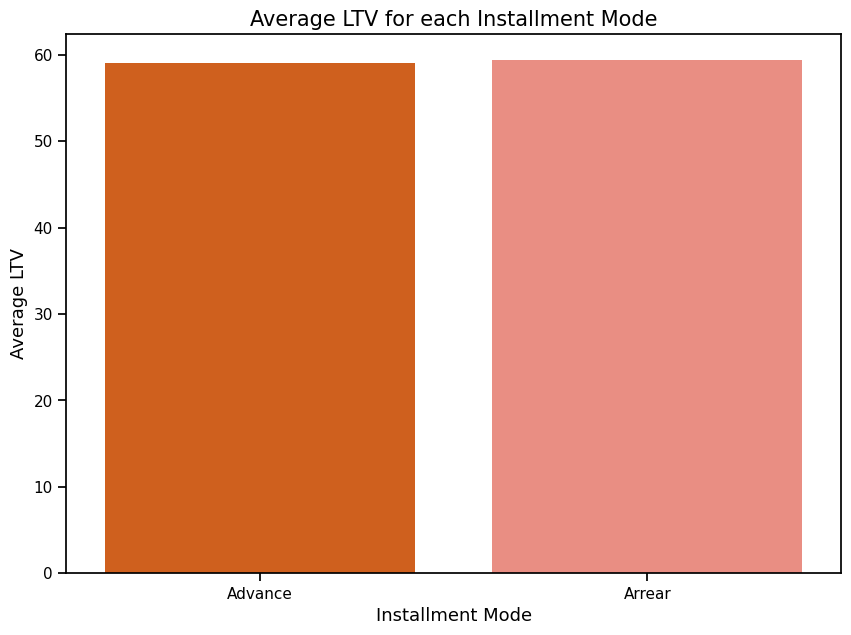

In [29]:
mean_LTV_insmode = df_data.groupby(['InstlmentMode']).mean()['LTV']
plt.figure(figsize=(10, 7))
sns.barplot(x=mean_LTV_insmode.index, y = mean_LTV_insmode, palette=['#EC5800', '#FA8072', '#F2D2BD', '#8B4000'])
plt.xlabel('Installment Mode', size=13)
plt.ylabel('Average LTV', size=13)
plt.title("Average LTV for each Installment Mode", size=15)

In [30]:
mean_LTV_insmode

InstlmentMode
Advance    59.093110
Arrear     59.412294
Name: LTV, dtype: float64

<ipython-input-31-d2b8f03f72e2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_LTV_paymentmode = df_data.groupby(['PaymentMode']).mean()['LTV'].sort_values(ascending=False)


Text(0.5, 1.0, 'Average LTV for each Payment Mode')

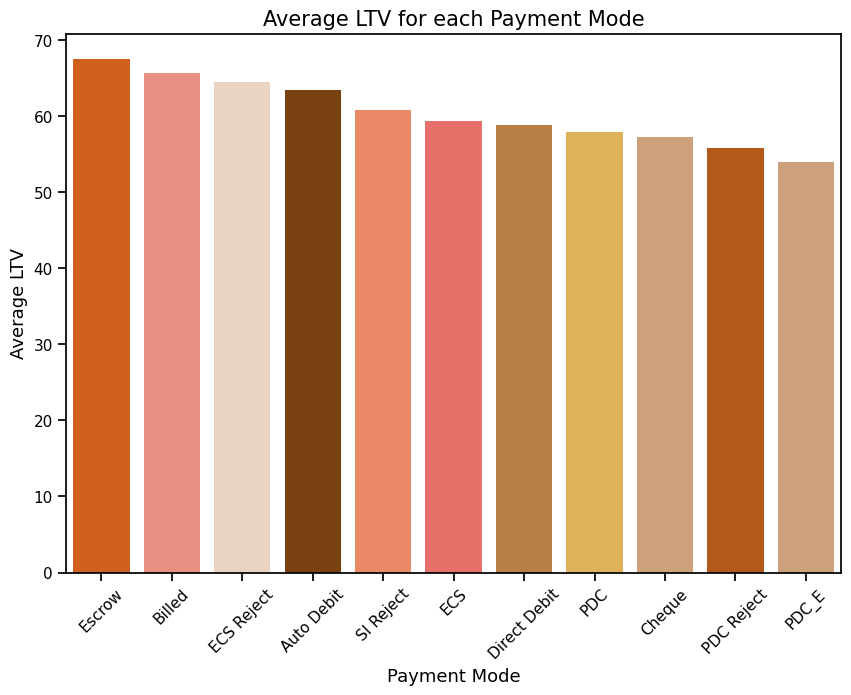

In [31]:
mean_LTV_paymentmode = df_data.groupby(['PaymentMode']).mean()['LTV'].sort_values(ascending=False)
plt.figure(figsize=(10, 7))
sns.barplot(x=mean_LTV_paymentmode.index, y = mean_LTV_paymentmode, palette=['#EC5800', '#FA8072', '#F2D2BD', '#8B4000', '#FF7F50', '#FA5F55', '#CD7F32', '#F4BB44', '#DAA06D', '#CC5500','#DAA06D'])
plt.xlabel('Payment Mode', size=13)
plt.xticks(rotation=45)
plt.ylabel('Average LTV', size=13)
plt.title("Average LTV for each Payment Mode", size=15)

In [32]:
mean_LTV_paymentmode

PaymentMode
Escrow          67.464286
Billed          65.645635
ECS Reject      64.438299
Auto Debit      63.368469
SI Reject       60.829006
ECS             59.369993
Direct Debit    58.844897
PDC             57.856750
Cheque          57.192133
PDC Reject      55.732000
PDC_E           53.912743
Name: LTV, dtype: float64

In [33]:
df_data['PaymentMode'].value_counts()

ECS             29407
Direct Debit    29333
PDC             22619
Billed          14959
PDC_E            8479
Auto Debit        797
SI Reject         704
Cheque            422
ECS Reject        394
Escrow              7
PDC Reject          5
Name: PaymentMode, dtype: int64

Loans with the 'Closed' status have a lower average and median LTV than the ones with the 'Active' status

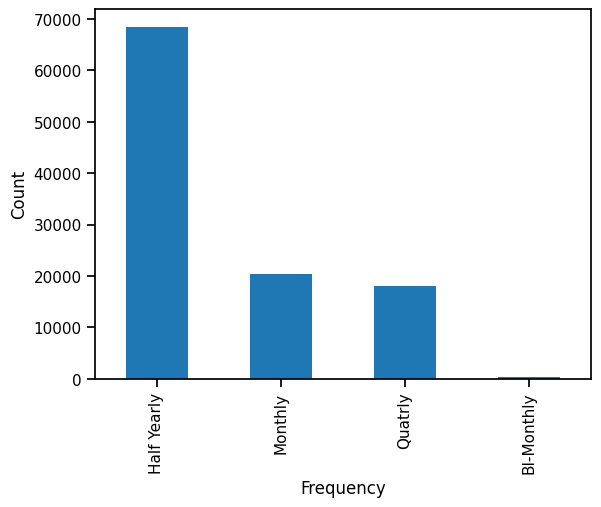

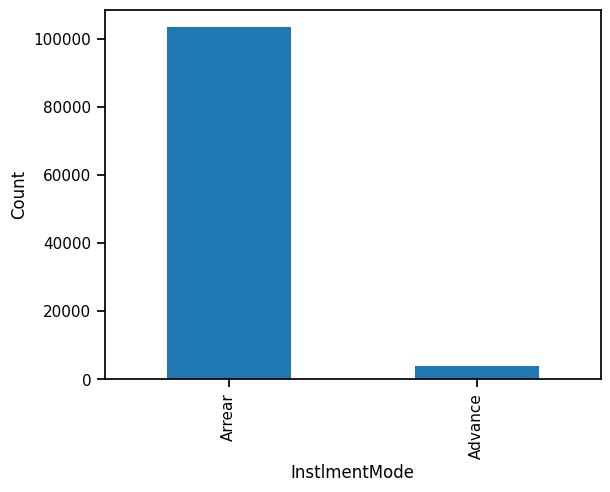

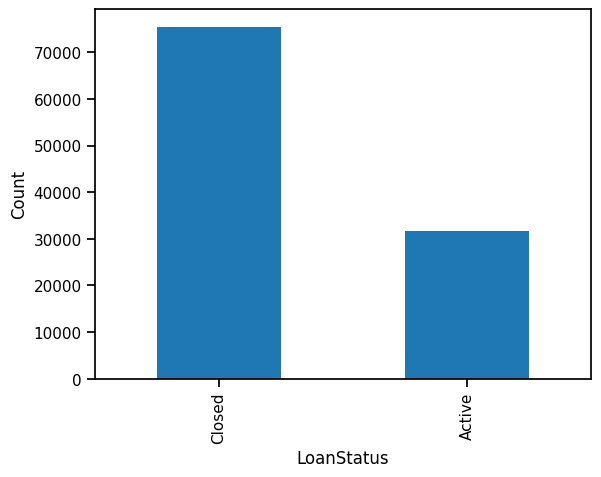

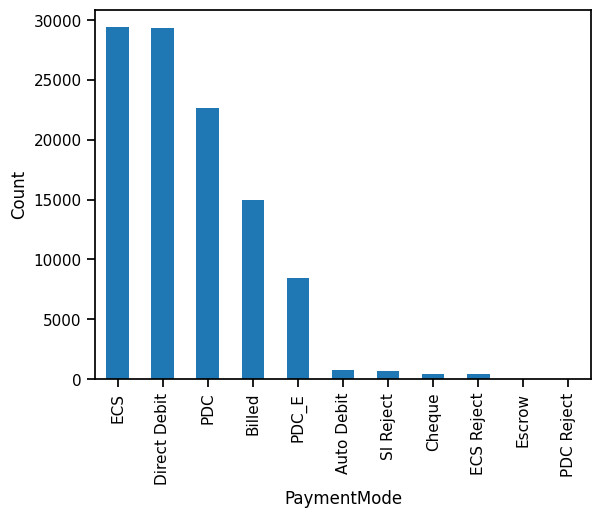

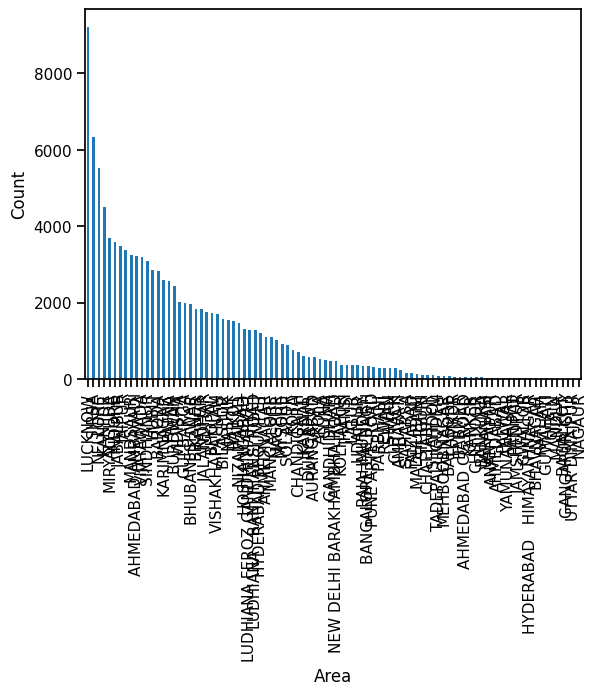

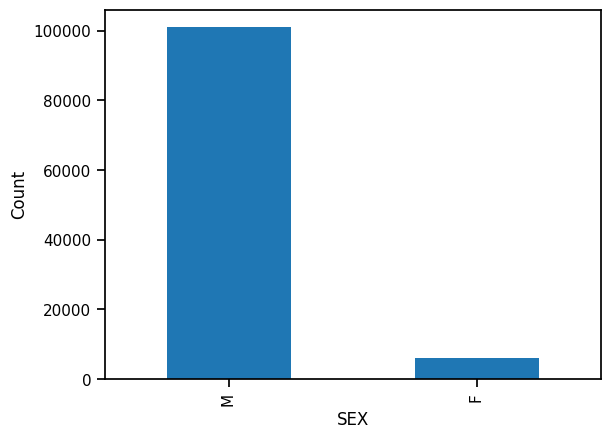

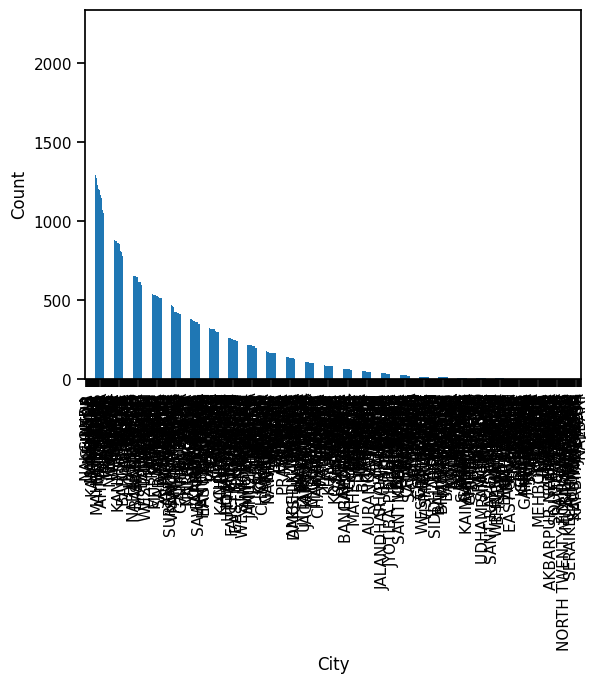

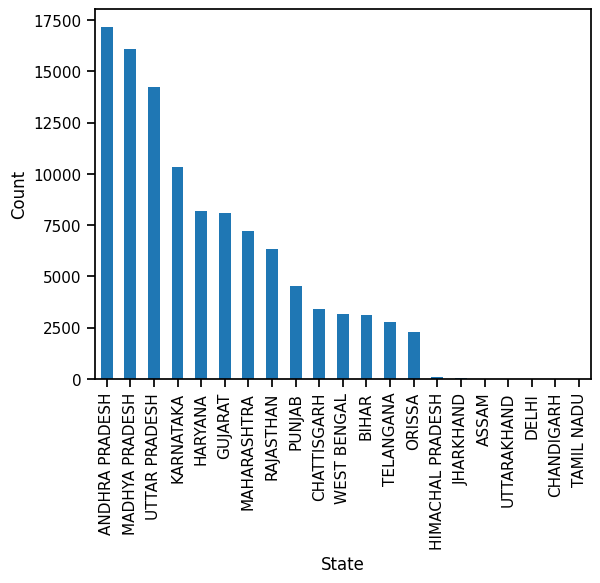

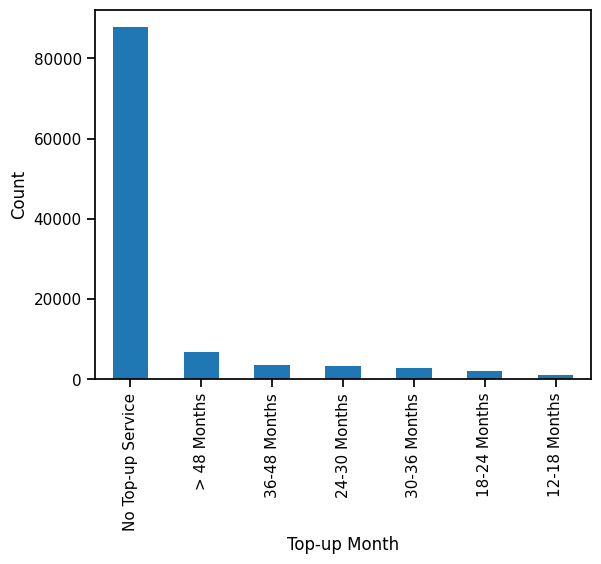

In [34]:
for col in df_data.columns:
  if df_data[col].dtypes == 'object':
    df_data[col].value_counts().plot(kind='bar') 
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()